# Effective TensorFlow

## 1 基本的数据结构

In [1]:
# Numpy
# 用Numpy产生随机数向量，并进行向量点乘

import numpy as np

x = np.random.normal(size=[3,3])
y = np.random.normal(size=[3,3])
z = np.dot(x,y)

print(z)

[[ 0.80236723 -0.72615633  0.74884724]
 [-0.35499364  0.83317327 -1.39034001]
 [-2.80633639  2.81632086  0.7470597 ]]


In [2]:
# TensorFlow
# 用TensorFlow产生两个随机矩阵，并计算两个矩阵的乘积

import tensorflow as tf
x = tf.random_normal([3,3])
y = tf.random_normal([3,3])
z = tf.matmul(x,y)

with tf.Session() as sess:
    print(sess.run(z))

[[-0.06076807 -2.09271359 -0.41827142]
 [-1.60172617  3.15638876  1.11673987]
 [-0.31115821  1.31234944  0.39941484]]


## 2 使用TensorFlow拟合曲线

假设有这样一条曲线， f(x) = 5x^2 + 3，用它产生数据，还有一条这样的曲线g(x, w) = w0 x^2 + w1 x + w2，让两条曲线近似相等，计算出所最有的W。

In [3]:
# 重置计算图
tf.reset_default_graph()

# 引入包
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 记录不长
show_step = 20
# 记录损失序列
all_loss = []

# 两个占位符
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# 权重系数用变量表示
w = tf.get_variable("w", shape=[3,1])

# 合并出一个张量，
f = tf.stack([tf.square(x),x, tf.ones_like(x)], 1)

# 实际g函数的值（这里消除了维度维1的轴，进行张量压缩）
yhat = tf.squeeze(tf.matmul(f,w),1)

# 定义损失函数
loss = tf.nn.l2_loss(yhat - y) + 0.1 * tf.nn.l2_loss(w)

# 定义优化操作
train_op = tf.train.AdamOptimizer(0.01).minimize(loss)

# 定义一个函数产生数据
def generate_data():
    x_val = np.random.uniform(-10.0, 10.0, size=100)
    y_val = 5 * np.square(x_val) + 3
    return x_val, y_val

# 开启一个Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 进行epoch=1000的迭代优化
for i in range(1000):
    # 产生数据
    x_val, y_val = generate_data()
    # 运行一次优化
    _, loss_val = sess.run([train_op, loss], {x:x_val, y:y_val})
    # 如果步长满足，则记录损失
    if (i+1) % show_step == 0:
        all_loss = np.append(all_loss, loss_val)

# 画出损失变化曲线图
x = np.arange(1,1001,show_step)
plt.plot(x, all_loss, 'b', label = "Loss")
plt.legend()
plt.show()

print(sess.run([w]))

[array([[ 4.74912357],
       [-0.0360656 ],
       [ 5.31532383]], dtype=float32)]


## 3 线性拟合

拟合出一条y = x * 2 + 3的直线

Epoch is 99, cost is 0.438810259
Epoch is 199, cost is 0.059446841
Epoch is 299, cost is 0.008053469
Epoch is 399, cost is 0.001090974
Epoch is 499, cost is 0.000147801
Epoch is 599, cost is 0.000020018
Epoch is 699, cost is 0.000002707
Epoch is 799, cost is 0.000000368
Epoch is 899, cost is 0.000000045
Epoch is 999, cost is 0.000000022
Epoch is 1099, cost is 0.000000022
Epoch is 1199, cost is 0.000000022
Epoch is 1299, cost is 0.000000022
Epoch is 1399, cost is 0.000000022
Epoch is 1499, cost is 0.000000022
Epoch is 1599, cost is 0.000000022
Epoch is 1699, cost is 0.000000022
Epoch is 1799, cost is 0.000000022
Epoch is 1899, cost is 0.000000022
Epoch is 1999, cost is 0.000000022
Trainning Finished!


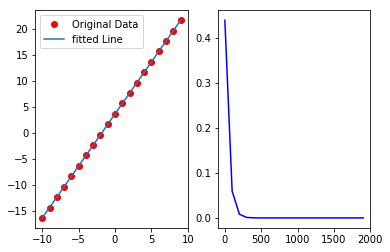

2.0
3.60206


In [4]:
# 重置计算图
tf.reset_default_graph()

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 迭代次数
epoches = 2000
show_step = 100

# 训练数据
xValue = np.arange(-10,10,1)
yValue = xValue *2 + 3 + np.random.uniform(-10,10)

# 记录样本总数
nSamples = xValue.size

X = tf.placeholder(dtype = tf.float32)
Y = tf.placeholder(dtype = tf.float32)

# 定义权值和偏置
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

# 定义预测
pred = tf.add(tf.multiply(X, W), b)

# 定义损失函数
loss = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * nSamples)

# 定义学习率
learningRate = 0.01;
# 定义训练器和优化操作
trainer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
optimizer = trainer.minimize(loss)

# 定义初始化全局变量
init = tf.global_variables_initializer()

# 记录所有的损失
all_loss = []

# 在Session中运行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epoches):
        for (x, y) in zip(xValue, yValue):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if (epoch + 1) % show_step == 0:
            loss_val = sess.run(loss, feed_dict={X:xValue, Y:yValue})
            all_loss = np.append(all_loss, loss_val)
            print("Epoch is {}, cost is {:.9f}".format(epoch, loss_val))
            
    print("Trainning Finished!")
    # 画图
    x = np.arange(1,epoches +1, show_step)
    plt.subplot(1,2,1)
    plt.plot(xValue, yValue, 'ro', label = "Original Data")
    plt.plot(xValue, sess.run(pred, feed_dict={X:xValue}), label = "fitted Line")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, all_loss, 'b', label ="Loss")
    plt.show()
    
    print(sess.run(W))
    print(sess.run(b))

**注意：**
上面两个都是回归的例子，但是细心一点就会发现，第一个例子使用的是`tf.matmul`第二个例子是使用的是哟`tf.multiply`，这两个不能混用，看看两个函数的定义：

1. tf.multiply
定义如下
```
tf.multiply(
    x,
    y,
    name=None
)
```
其中x和y都是两个张量，并没有限制x和y的rank是多少。其中那个name是可选参数，用于定义操作的名称，在日志中显示中会有用。

2. tf.matmul
定义如下：
```
tf.matmul(
    a,
    b,
    transpose_a=False,
    transpose_b=False,
    adjoint_a=False,
    adjoint_b=False,
    a_is_sparse=False,
    b_is_sparse=False,
    name=None
)
```
明显比简单的两个张量乘法函数multiply复杂的多，这个函数要求两个参数张量的rank必须是大于等于2，主要是对两个张量的内两个维度进行乘法运算。另外还支持系数张量的运算。下面的一个小例子演示一下。rank为2和3时函数的输出结果。

In [5]:
tf.reset_default_graph()

# 2-D tensor `a`
# [[1, 2, 3],
#  [4, 5, 6]]
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])

# 2-D tensor `b`
# [[ 7,  8],
#  [ 9, 10],
#  [11, 12]]
b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])

# `a` * `b`
# [[ 58,  64],
#  [139, 154]]
c = tf.matmul(a, b)

sess = tf.Session()

print("This is 2-d")
print(sess.run(c))

# 3-D tensor `a`
# [[[ 1,  2,  3],
#   [ 4,  5,  6]],
#  [[ 7,  8,  9],
#   [10, 11, 12]]]
a = tf.constant(np.arange(1, 13, dtype=np.int32),
                shape=[2, 2, 3])

# 3-D tensor `b`
# [[[13, 14],
#   [15, 16],
#   [17, 18]],
#  [[19, 20],
#   [21, 22],
#   [23, 24]]]
b = tf.constant(np.arange(13, 25, dtype=np.int32),
                shape=[2, 3, 2])

# `a` * `b`
# [[[ 94, 100],
#   [229, 244]],
#  [[508, 532],
#   [697, 730]]]
c = tf.matmul(a, b)

print("\n")
print("This is 3-d")
print(sess.run(c))

# Since python >= 3.5 the @ operator is supported (see PEP 465).
# In TensorFlow, it simply calls the `tf.matmul()` function, so the
# following lines are equivalent:
# d = a @ b @ [[10.], [11.]]
# d = tf.matmul(tf.matmul(a, b), [[10.], [11.]])

# print(sess.run(d))

This is 2-d
[[ 58  64]
 [139 154]]


This is 3-d
[[[ 94 100]
  [229 244]]

 [[508 532]
  [697 730]]]


## 4 理解静态shape和动态shape


TensorFlow有两种shape，分别是：

- 静态shape，在构建计算图的时候就已经知道了shape
- 动态图，在实际的Session运行的时候才知道

比如：

In [6]:
tf.reset_default_graph()

a = tf.placeholder(tf.float32, [None,128])
static_shape = a.shape
print(static_shape)
static_shape_list = static_shape.as_list()
print(static_shape_list)

(?, 128)
[None, 128]


使用`tf.shape`获取数据的动态shape，比如：

In [7]:
dynamic_shape = tf.shape(a)
print(dynamic_shape)

Tensor("Shape:0", shape=(2,), dtype=int32)


也可以使用`set_shape`方法设置shape，静态动态都可以,前提必须是兼容的，也就是如果一个张量被定义成一个动态类型，可以被设置尺寸兼容的静态类型，然后就不能改了。

In [8]:
a.set_shape([32,128])
print(a.shape.as_list())
a.set_shape([None, 128])
print(a.shape)

[32, 128]
(32, 128)


In [9]:
b = tf.placeholder(tf.float32, [None, 128])
print(b.shape.as_list())
b = tf.reshape(b, [32,32])
print(b.shape.as_list())

[None, 128]
[32, 32]


可以使用`tf.reshape`方法进行修改shape，但是只是对动态类型进行reshape